This notebook demonstrates the whole process of preprocessing, imputation (using nbp as a first step), and applying the Horvath model for the RRBS data.

In [2]:
import pandas as pd
import utils
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# horvath = utils.preprocess_horvath_file("../data/gb-2013-14-10-r115-S3.csv")
horvath = pd.read_csv('../data/gb-2013-14-10-r115-S3_preprocessed.csv', sep='\t')
horvath.head()

,marker,coefs
0,cg00075967,0.129337
1,cg00374717,0.005018
2,cg00864867,1.599764
3,cg00945507,0.056852
4,cg01027739,0.102863


In [4]:
# data = utils.preprocess_data('../data/filtered_cytosines_freq.tsv')
data = pd.read_csv('../data/filtered_cytosines_freq_preprocessed.tsv', sep='\t')
data.head()

,chromosome,position,OD10,OD11,OD12,OD13,OD14,OD15,OD16,OD17,...,YD20,YD21,YD2,YD3,YD4,YD5,YD6,YD7,YD8,YD9
0,chr1,10497,71.956,93.640,94.410,92.163,86.408,92.143,91.304,69.029,...,92.88,80.769,85.714,73.761,84.277,80.408,94.667,92.623,83.992,89.620
1,chr1,10525,93.704,90.813,95.679,89.375,93.528,95.714,93.103,89.737,...,90.00,87.179,91.081,91.329,92.332,85.537,92.857,89.617,92.073,94.684
2,chr1,10542,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,...,100.00,100.000,100.000,100.000,100.000,100.000,99.647,99.708,99.781,100.000
3,chr1,10589,100.000,NaN,NaN,0.000,100.000,NaN,100.000,NaN,...,NaN,85.714,92.308,NaN,100.000,50.000,0.000,91.379,91.892,81.818
4,chr1,10609,95.455,NaN,NaN,0.000,100.000,NaN,63.636,NaN,...,NaN,85.714,94.737,NaN,100.000,100.000,NaN,96.296,97.222,80.000


In [5]:
X_imputed_nbp = utils.impute_nbp(data)

  0%|          | 0/1047277 [00:00<?, ?it/s]/Users/Emiliia.Lekhman/Desktop/project/tests/utils/imputation.py:131: RuntimeWarning: Mean of empty slice
  imputed_data.loc[row, columns[col + 2]] = np.nanmean(values[left:right, col])
100%|██████████| 1047277/1047277 [02:24<00:00, 7225.21it/s]


In [6]:
# map_data = utils.preprocess_map_file('../data/hm27.hg19.manifest.bed')
map_data = pd.read_csv("../data/hm27.hg19.manifest_preprocessed.bed", sep="\t")
map_data.head()

,chromosome,position,marker
0,chr1,860185,cg04672450
1,chr1,861317,cg14324200
2,chr1,894587,cg04485075
3,chr1,894954,cg19923810
4,chr1,902025,cg21832150


In [7]:
features = utils.get_features(X_imputed_nbp, horvath.marker, map_data)

In [8]:
predicted_age = utils.apply_horvath(features, horvath.coefs.values)

Text(0, 0.5, 'predicted age')

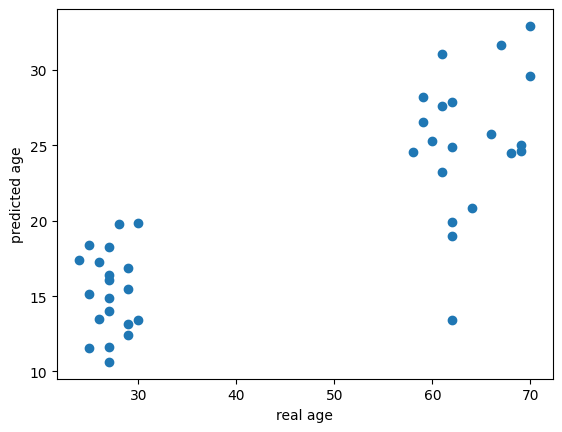

In [9]:
real_age_data = pd.read_csv('../data/RRBS.phase1_yo_datasets.Monocyte.tsv', sep='\t')
real_age_data = real_age_data.sort_values('Donor ID')
real_age = real_age_data['Donor Age']
plt.scatter(real_age, predicted_age)
plt.xlabel("real age")
plt.ylabel("predicted age")

In [10]:
def label(index):
    return 0 if index[0] == "Y" else 1
labels = real_age_data["Donor ID"].apply(label)

Text(0, 0.5, 'predicted age')

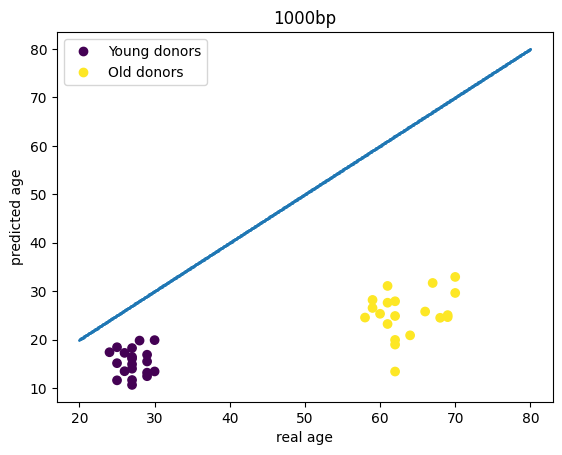

In [11]:
scatter1 = plt.scatter(real_age, predicted_age, c=labels)
plt.scatter(np.linspace(20, 80, 1000), np.linspace(20, 80, 1000), s=1)
plt.legend(handles=scatter1.legend_elements()[0], labels=["Young donors", "Old donors"])
plt.title("nbp")
plt.xlabel('real age')
plt.ylabel('predicted age')

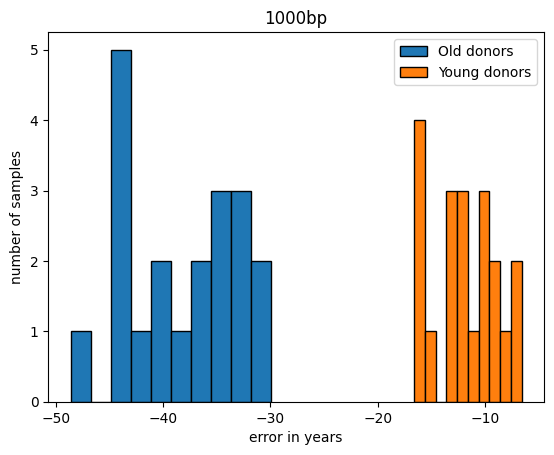

In [12]:
errors = predicted_age - real_age
plt.hist(errors[labels.astype(bool)], ec="k", label="Old donors")
plt.hist(errors[np.invert(labels.astype(bool))], ec="k", label="Young donors")
plt.xlabel("error in years")  
plt.ylabel("number of samples")
plt.title("nbp")
plt.legend()